In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('Final_Booking_Data.csv')

In [4]:
data.head()

,Booking_ID,Customer_ID,Booking_Status,Vehicle_Type,Pickup_Location,Drop_Location,Ride_Distance,Only_Date,Month,Day_Name,...,Time_Slot,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Booking_Value,Payment_Method,Driver_Ratings,Customer_Rating
0,CNR7153255142,CID713523,Canceled by Driver,Prime Sedan,Tumkur Road,RT Nagar,0.0,2024-07-26,7,Friday,...,Afternoon,NaN,NaN,Reason not mentioned,Personal & Car related issue,Nothing Mentioned,444.0,Not Provided,NaN,NaN
1,CNR2940424040,CID225428,Success,Bike,Magadi Road,Varthur,13.0,2024-07-25,7,Thursday,...,Night,203.0,30.0,Reason not mentioned,Reason not specified,No,158.0,Cash,4.1,4.0
2,CNR2982357879,CID270156,Success,Prime SUV,Sahakar Nagar,Varthur,40.0,2024-07-30,7,Tuesday,...,Evening,238.0,130.0,Reason not mentioned,Reason not specified,No,386.0,UPI,4.2,4.8
3,CNR2395710036,CID581320,Canceled by Customer,eBike,HSR Layout,Vijayanagar,0.0,2024-07-22,7,Monday,...,Night,NaN,NaN,Driver is not moving towards pickup location,Reason not specified,Nothing Mentioned,384.0,Not Provided,NaN,NaN
4,CNR1797421769,CID939555,Success,Mini,Rajajinagar,Chamarajpet,45.0,2024-07-02,7,Tuesday,...,Morning,252.0,80.0,Reason not mentioned,Reason not specified,No,822.0,Credit Card,4.0,3.0


<h1>1. Booking Status Distribution</h1>

In [16]:
data['Booking_Status'].value_counts()

Booking_Status
Success                 44271
Canceled by Driver      12728
Canceled by Customer     7214
Driver Not Found         6988
Name: count, dtype: int64

In [13]:
plt.style.use("ggplot")
sns.set_palette("Set2")

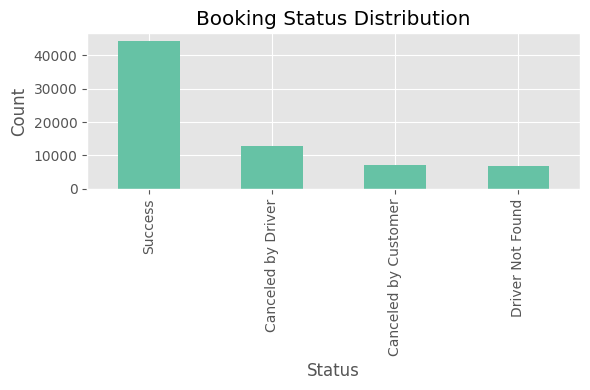

In [14]:
plt.figure(figsize=(6, 4))
data['Booking_Status'].value_counts().plot(kind='bar')
plt.title("Booking Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


<h5>Insights You Can Use:</h5>
<p>
1. ~38% of rides fail to complete – a major opportunity for improvement!</p>
<p>2. Driver-side issues (cancellations + unavailability) account for nearly 28% of all bookings.</p>
<p>3. Customer-side cancellations make up ~10%.
</p>

<h1>2. Cancellations by Time Slot</h1>

In [9]:
cancelled_rides = data[data['Booking_Status'] != 'Success']

In [23]:
cancelled_rides['Time_Slot'].value_counts()

Time_Slot
Night        8948
Morning      7893
Afternoon    5574
Evening      4515
Name: count, dtype: int64

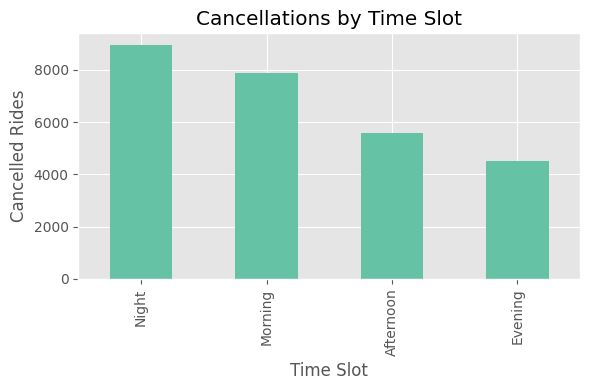

In [25]:
plt.figure(figsize=(6, 4))
cancelled_rides['Time_Slot'].value_counts().plot(kind='bar')
plt.title("Cancellations by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Cancelled Rides")
plt.tight_layout()
plt.show()

<h4>Insights : </h4>
<p>Night and Morning have the highest cancellations 64.7% possibly due to:</p>
<p>Driver unavailability</p>
<p>Safety concerns</p>
<p>Traffic/operational delays</p>


<h1>3. Cancellations by Day</h1>

In [32]:
cancelled_rides['Day_Name'].value_counts()

Day_Name
Monday       4572
Tuesday      4553
Wednesday    3635
Saturday     3570
Friday       3565
Thursday     3563
Sunday       3472
Name: count, dtype: int64

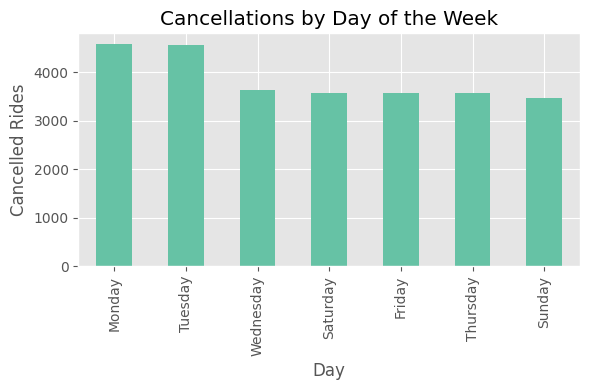

In [34]:
plt.figure(figsize=(6,4))
cancelled_rides['Day_Name'].value_counts().plot(kind='bar')
plt.title('Cancellations by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Cancelled Rides')
plt.tight_layout()
plt.show()

<h4>Insights : </h4>
<p>Weekdays dominate cancellations, especially Monday and Tuesday.</p>
<p>Monday = highest — possibly due to:</p>
<p>Rush hour traffic</p>
<p>Start-of-week operational lags</p>
<p>Driver fatigue after the weekend</p>

<h1>4. Cancellation by weekend vs weekday</h1>

In [33]:
cancelled_rides['IS_WEEKEND'].value_counts()

IS_WEEKEND
0    19888
1     7042
Name: count, dtype: int64

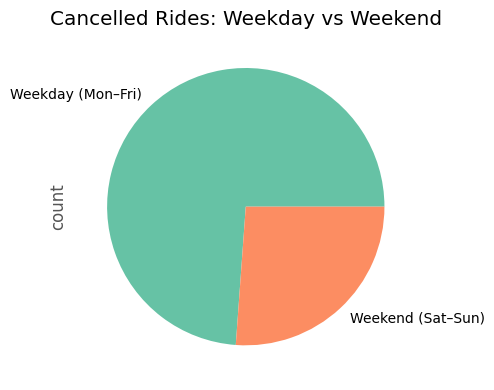

In [38]:
labels = ['Weekday (Mon–Fri)', 'Weekend (Sat–Sun)']
plt.figure(figsize=(6,4))
cancelled_rides['IS_WEEKEND'].value_counts().plot(kind='pie',labels=labels)
plt.title("Cancelled Rides: Weekday vs Weekend")
plt.tight_layout()
plt.show()

<h4>Insights : </h4>
<p>Weekdays have almost 3× more cancellations than weekends.</p>
<p>Weekdays : 73.9%</p>
<p>Weekend : 26.1%</p>

<h1>5. Cancellation Reason Breakdown</h1>

In [47]:
cancelled_rides['Booking_Status'].value_counts()

Booking_Status
Canceled by Driver      12728
Canceled by Customer     7214
Driver Not Found         6988
Name: count, dtype: int64

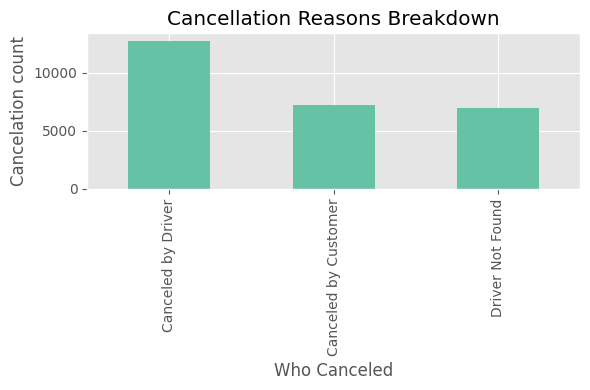

In [49]:
plt.figure(figsize=(6,4))
cancelled_rides['Booking_Status'].value_counts().plot(kind='bar')
plt.title("Cancellation Reasons Breakdown")
plt.xlabel('Who Canceled')
plt.ylabel('Cancelation count')
plt.tight_layout()
plt.show()

<h4>Insights : </h4>
<p>Drivers are responsible for nearly half of all cancellations.</p>
<p>Driver Not Found also likely points to supply-side problems.</p>
<p>Combined, driver-side issues account for 73.2% of failed bookings.</p>
<p>This is a key business insight for Ola or similar platforms.</p>

<h1>Customers Reasons to Cancel Ride</h1>

In [61]:
cancelled_rides['Canceled_Rides_by_Customer'].value_counts().iloc[1:]

Canceled_Rides_by_Customer
Driver is not moving towards pickup location    2161
Driver asked to cancel                          1851
Change of plans                                 1469
AC is Not working                               1055
Wrong Address                                    678
Name: count, dtype: int64

<h4></h4>
<p>Driver behavior & app experience are top reasons for customer cancellations.</p>

<p>Several of these reasons (AC issues, driver refusal, wrong address) are actionable by Ola.</p>

<p>More than 50% of these are preventable with system improvements.</p>

<h1>Drivers Reason to Cancel Ride</h1>

In [60]:
cancelled_rides['Canceled_Rides_by_Driver'].value_counts().iloc[1:]

Canceled_Rides_by_Driver
Personal & Car related issue           4449
Customer related issue                 3752
Customer was coughing/sick             2538
More than permitted people in there    1989
Name: count, dtype: int64

<p>Many issues are driver-protection-based, especially post-COVID.</p>
<p>Almost 60% of these are related to either personal or customer behavior.</p>
<p>Suggests need for:</p>
<p>Better communication before ride</p>
<p>Health declarations during high-risk times</p>

In [78]:
data.columns

Index(['Booking_ID', 'Customer_ID', 'Booking_Status', 'Vehicle_Type',
       'Pickup_Location', 'Drop_Location', 'Ride_Distance', 'Only_Date',
       'Month', 'Day_Name', 'IS_WEEKEND', 'Hour', 'Time', 'Time_Slot', 'V_TAT',
       'C_TAT', 'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver',
       'Incomplete_Rides', 'Booking_Value', 'Payment_Method', 'Driver_Ratings',
       'Customer_Rating'],
      dtype='object')

In [87]:
data['Payment_Method'].value_counts()

Payment_Method
Not Provided    26930
Cash            24166
UPI             17974
Credit Card      1683
Debit Card        448
Name: count, dtype: int64

In [88]:
data

,Booking_ID,Customer_ID,Booking_Status,Vehicle_Type,Pickup_Location,Drop_Location,Ride_Distance,Only_Date,Month,Day_Name,...,Time_Slot,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Booking_Value,Payment_Method,Driver_Ratings,Customer_Rating
0,CNR7153255142,CID713523,Canceled by Driver,Prime Sedan,Tumkur Road,RT Nagar,0.0,2024-07-26,7,Friday,...,Afternoon,NaN,NaN,Reason not mentioned,Personal & Car related issue,Nothing Mentioned,444.0,Not Provided,NaN,NaN
1,CNR2940424040,CID225428,Success,Bike,Magadi Road,Varthur,13.0,2024-07-25,7,Thursday,...,Night,203.0,30.0,Reason not mentioned,Reason not specified,No,158.0,Cash,4.1,4.0
2,CNR2982357879,CID270156,Success,Prime SUV,Sahakar Nagar,Varthur,40.0,2024-07-30,7,Tuesday,...,Evening,238.0,130.0,Reason not mentioned,Reason not specified,No,386.0,UPI,4.2,4.8
3,CNR2395710036,CID581320,Canceled by Customer,eBike,HSR Layout,Vijayanagar,0.0,2024-07-22,7,Monday,...,Night,NaN,NaN,Driver is not moving towards pickup location,Reason not specified,Nothing Mentioned,384.0,Not Provided,NaN,NaN
4,CNR1797421769,CID939555,Success,Mini,Rajajinagar,Chamarajpet,45.0,2024-07-02,7,Tuesday,...,Morning,252.0,80.0,Reason not mentioned,Reason not specified,No,822.0,Credit Card,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71196,CNR3193933852,CID442451,Success,Auto,Rajajinagar,Sarjapur Road,4.0,2024-07-19,7,Friday,...,Morning,126.0,40.0,Reason not mentioned,Reason not specified,No,325.0,UPI,4.6,3.4
71197,CNR3906366271,CID538007,Success,Prime Plus,Electronic City,Varthur,28.0,2024-07-16,7,Tuesday,...,Morning,49.0,30.0,Reason not mentioned,Reason not specified,No,154.0,Cash,3.6,3.6
71198,CNR4789445170,CID382728,Canceled by Customer,Prime Plus,Sahakar Nagar,Rajarajeshwari Nagar,0.0,2024-07-03,7,Wednesday,...,Night,NaN,NaN,Driver is not moving towards pickup location,Reason not specified,Nothing Mentioned,447.0,Not Provided,NaN,NaN
71199,CNR5806198441,CID686055,Canceled by Driver,Bike,Rajarajeshwari Nagar,Electronic City,0.0,2024-07-29,7,Monday,...,Afternoon,NaN,NaN,Reason not mentioned,Customer was coughing/sick,Nothing Mentioned,833.0,Not Provided,NaN,NaN


<h1>Cancellation rate by day</h1>

In [7]:
# Example: Cancellation rate by day
total_by_day = data.groupby('Day_Name').size()

total_by_day

Day_Name
Friday        9392
Monday       11976
Saturday      9523
Sunday        9251
Thursday      9407
Tuesday      12130
Wednesday     9522
dtype: int64

In [10]:
cancelled_by_day = cancelled_rides.groupby('Day_Name').size()
cancelled_by_day


Day_Name
Friday       3565
Monday       4572
Saturday     3570
Sunday       3472
Thursday     3563
Tuesday      4553
Wednesday    3635
dtype: int64

In [11]:
cancel_rate_by_day = (cancelled_by_day / total_by_day * 100).round(2).sort_values(ascending=False)

In [12]:
cancel_rate_by_day

Day_Name
Monday       38.18
Wednesday    38.17
Friday       37.96
Thursday     37.88
Tuesday      37.54
Sunday       37.53
Saturday     37.49
dtype: float64

<h1>Cancelation Rate by Time Slot</h1>

In [16]:
total_by_time_slot = data.groupby('Time_Slot').size()

In [17]:
cancelled_by_time_slot = cancelled_rides.groupby('Time_Slot').size()

In [21]:
cancel_rate_by_time_slot = (cancelled_by_time_slot / total_by_time_slot * 100).round(2).sort_values(ascending=False)

In [22]:
cancel_rate_by_time_slot

Time_Slot
Evening      37.99
Morning      37.91
Night        37.86
Afternoon    37.52
dtype: float64

<h1>Cancellation Rate By Pickup Location</h1>

In [34]:
Total_by_Pickup_Location = data['Pickup_Location'].value_counts()
Cancelled_by_Pickup_Location = cancelled_rides['Pickup_Location'].value_counts()
Cancelled_Rate_by_Pickup_Location = (Cancelled_by_Pickup_Location / Total_by_Pickup_Location * 100).round(2).sort_values(ascending=False).head(5)
Cancelled_Rate_by_Pickup_Location

Pickup_Location
Langford Town    40.84
Hosur Road       40.37
Kengeri          39.99
Vijayanagar      39.99
Sahakar Nagar    39.77
Name: count, dtype: float64

<h1>Cancellation Rate By Drop Location</h1>

In [35]:
Total_by_Dropup_Location = data['Drop_Location'].value_counts()
Cancelled_by_Dropup_Location = cancelled_rides['Drop_Location'].value_counts()
Cancelled_Rate_by_Dropup_Location = (Cancelled_by_Dropup_Location / Total_by_Dropup_Location * 100).round(2).sort_values(ascending=False).head(5)
Cancelled_Rate_by_Dropup_Location

Drop_Location
Sarjapur Road    40.86
Marathahalli     40.19
Peenya           39.22
Hosur Road       39.19
Langford Town    39.13
Name: count, dtype: float64

<h4>Key Insights for the Client:</h4>

<p>Langford Town appears in both pickup and drop top 5, with >39% cancel rate → likely an operational bottleneck or poor connectivity area.</p>

<p>Hosur Road is another recurring location with a >40% cancel rate for both pickup and drop.</p>

<p>These areas might suffer from:</p>

<p>Low driver availability</p>

<p>High traffic congestion</p>

<p>Inaccurate location pinning in the app</p>

<h2>Pickup Location High Cancellation Alert: Langford Town & Hosur Road</h2>

In [39]:
Cancelation_By_Langford_Hosur_Location = cancelled_rides[cancelled_rides['Pickup_Location'].isin(['Langford Town','Hosur Road'])]

In [40]:
Cancelation_By_Langford_Hosur_Location['Booking_Status'].value_counts()

Booking_Status
Canceled by Driver      548
Driver Not Found        305
Canceled by Customer    294
Name: count, dtype: int64

In [41]:
Cancelation_By_Langford_Hosur_Location['Vehicle_Type'].value_counts()

Vehicle_Type
Prime SUV      185
eBike          174
Prime Plus     168
Bike           167
Mini           163
Auto           147
Prime Sedan    143
Name: count, dtype: int64

In [43]:
Cancelation_By_Langford_Hosur_Location['Day_Name'].value_counts()

Day_Name
Tuesday      200
Monday       195
Thursday     165
Wednesday    157
Friday       152
Saturday     144
Sunday       134
Name: count, dtype: int64

In [44]:
Cancelation_By_Langford_Hosur_Location['Time_Slot'].value_counts()

Time_Slot
Night        402
Morning      339
Afternoon    229
Evening      177
Name: count, dtype: int64

<p>"Langford Town and Hosur Road are severe cancellation hotspots, especially on weekdays during Night and Morning time slots. The issue is largely driven by driver-side constraints — cancellations and unavailability — cutting across premium and two-wheeler rides. These patterns result in frustrated commuters during peak office hours, impacting customer satisfaction and revenue recovery potential."</p>

<h2>Drop Location High Cancellation Alert: Langford Town & Hosur Road</h2>

In [46]:
Drop_Cancelation_By_Langford_Hosur_Location = cancelled_rides[cancelled_rides['Drop_Location'].isin(['Langford Town','Hosur Road'])]

In [47]:
Drop_Cancelation_By_Langford_Hosur_Location['Booking_Status'].value_counts()

Booking_Status
Canceled by Driver      530
Canceled by Customer    296
Driver Not Found        294
Name: count, dtype: int64

In [48]:
Drop_Cancelation_By_Langford_Hosur_Location['Vehicle_Type'].value_counts()

Vehicle_Type
Prime Sedan    183
eBike          176
Prime Plus     165
Prime SUV      158
Bike           151
Auto           148
Mini           139
Name: count, dtype: int64

In [49]:
Drop_Cancelation_By_Langford_Hosur_Location['Day_Name'].value_counts()

Day_Name
Monday       184
Tuesday      183
Saturday     160
Sunday       157
Wednesday    154
Friday       151
Thursday     131
Name: count, dtype: int64

In [50]:
Drop_Cancelation_By_Langford_Hosur_Location['Time_Slot'].value_counts()

Time_Slot
Night        357
Morning      317
Afternoon    266
Evening      180
Name: count, dtype: int64

<p>“Langford Town and Hosur Road consistently show high cancellation rates as both pickup and drop locations. The bulk of cancellations are during Night and Morning hours, with the majority caused by drivers rejecting or failing to complete rides. The cancellations are spread across all vehicle categories, especially Prime and two-wheeler options, indicating systemic inefficiencies. This strongly suggests the need for localized, time-sensitive interventions.”</p>

<h1>Repeat Cancellers Insight Report</h1>

In [108]:
repeat_cancelled_rides = cancelled_rides[cancelled_rides['Customer_ID'].isin(
    cancelled_rides['Customer_ID'].value_counts()[lambda x: x >= 2].index
)]
print(repeat_cancelled_rides['Booking_ID'].count())

# 750 rides have been cancelled more than 2 times.

750


In [109]:
ID_OF_CUST_WITH_FREQUENT_CANCELLATION = repeat_cancelled_rides.groupby('Customer_ID').size().keys()

In [110]:
sum = 0
for i in ID_OF_CUST_WITH_FREQUENT_CANCELLATION:
    sum = sum + 1

print(sum)

# 372 customers are involved in repeatative cancellation case.

372


In [81]:
repeat_cancelled_rides['Booking_Status'].value_counts()

Booking_Status
Canceled by Driver      363
Driver Not Found        194
Canceled by Customer    193
Name: count, dtype: int64

In [112]:
repeat_cancelled_rides['Day_Name'].value_counts()

Day_Name
Monday       140
Tuesday      116
Thursday     109
Wednesday    106
Saturday     105
Friday        95
Sunday        79
Name: count, dtype: int64

In [113]:
repeat_cancelled_rides['Time_Slot'].value_counts()

Time_Slot
Night        254
Morning      200
Afternoon    153
Evening      143
Name: count, dtype: int64

In [115]:
repeat_cancelled_rides['Canceled_Rides_by_Driver'].value_counts().iloc[1:]

Canceled_Rides_by_Driver
Personal & Car related issue           132
Customer related issue                 101
Customer was coughing/sick              80
More than permitted people in there     50
Name: count, dtype: int64

In [118]:
repeat_cancelled_rides['Canceled_Rides_by_Customer'].value_counts().iloc[1:]

Canceled_Rides_by_Customer
Driver is not moving towards pickup location    55
Driver asked to cancel                          44
Change of plans                                 42
AC is Not working                               32
Wrong Address                                   20
Name: count, dtype: int64

<p>
    Executive Summary:
750 ride cancellations were made by customers who had cancelled 2 or more times.

These bookings came from 372 unique customers, representing a sizable chunk of repeat cancellation behavior.

Both driver-side and customer-side issues were involved — indicating a two-way breakdown in the ride fulfillment process.
</p>
<p>
    A detailed analysis of repeat ride cancellations revealed that 372 customers were responsible for 750 cancelled rides, indicating a significant pattern of habitual cancellation behavior. Nearly 74% of these cancellations were due to driver-side issues—either cancellations or unavailability—suggesting possible negative sentiment or avoidance of certain customers by drivers. These repeat cancellations primarily occurred on weekdays, especially Mondays and Tuesdays, and were heavily concentrated during Night and Morning time slots, disrupting peak commute hours. The most common reasons cited by drivers included personal or vehicle-related issues and discomfort with customer behavior, while customers often canceled due to drivers not moving toward pickup locations or asking them to cancel. This behavior cluster points to systemic issues in matching reliability, route planning, and trust between parties. Addressing this segment through better driver-customer matching, incentive adjustments, and flagging high-risk users could meaningfully reduce cancellations, improve platform efficiency, and enhance overall customer experience.
</p>